## EDA (Exploratory Data Analysis): HDI project

Summary of the data wrangling

The first step of this project has created a cleaned dataset including relevant 
information confirming we have the right data for assessing the most important 
factors impacting Human development index with data for 189 countries. We have 
idenfified our target variable: pov_index for which we will assess the correlation with others factors

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Load the data

In [2]:
# Loading the data created from the wrangling step
raw_df = pd.read_csv('hdi_wrangling.csv')

### Exploring the data

In [3]:
raw_df.head()

,Unnamed: 0,Country,hdi_2009,hdi_2019,hdi_var,edu_2009,edu_2019,edu_var,pov_index
0,0,Afghanistan,0.460,0.511,0.051,8.9,10.2,1.3,0.27200
1,1,Albania,0.733,0.795,0.062,12.3,14.7,2.4,0.00300
2,2,Algeria,0.711,0.748,0.037,13.6,14.6,1.0,0.00800
3,3,Andorra,0.839,0.868,0.029,11.7,13.3,1.6,0.14129
4,4,Angola,0.515,0.581,0.066,9.0,11.8,2.8,0.28200


In [4]:
df = raw_df[['Country', 'hdi_2019','hdi_var', 'edu_2019', 'edu_var', 'pov_index']]

In [5]:
df.describe()

,hdi_2019,hdi_var,edu_2019,edu_var,pov_index
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.722423,0.040715,13.326984,0.824599,0.141290
std,0.149791,0.026742,2.940014,1.000975,0.115049
min,0.394000,-0.107000,5.000000,-2.999999,0.001000
25%,0.602000,0.029000,11.400000,0.300000,0.066000
50%,0.740000,0.040715,13.200000,0.800000,0.141290
75%,0.829000,0.056000,15.200000,1.300000,0.141290
max,0.957000,0.113000,22.000000,3.800000,0.590000


### Overview of the dependant variable

Text(0.5, 0, 'Poverty index')

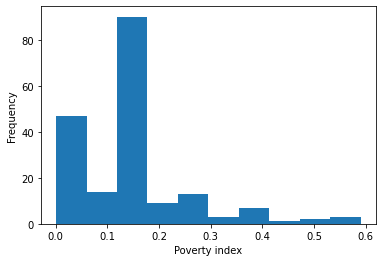

In [6]:
# Making a histogram of the hdi_var variable.
df['pov_index'].plot(kind = 'hist' )
plt.xlabel('Poverty index')

<AxesSubplot:xlabel='pov_index'>

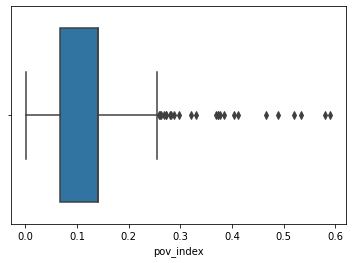

In [7]:
sns.boxplot( x = df['pov_index'])

Text(0.5, 0, 'HDI')

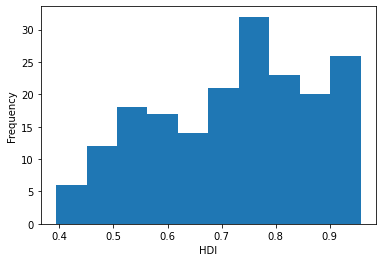

In [8]:
df['hdi_2019'].plot(kind = 'hist')
plt.xlabel('HDI')

Text(0.5, 0, 'Education')

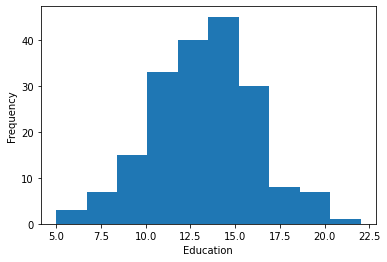

In [9]:
df['edu_2019'].plot(kind = 'hist')
plt.xlabel('Education')

### Visualize Relationships between Variables

In [10]:
# Creating a box plot to spot any outlier

df.corr()

,hdi_2019,hdi_var,edu_2019,edu_var,pov_index
hdi_2019,1.000000,-0.226686,0.903527,0.009894,-0.539800
hdi_var,-0.226686,1.000000,-0.113466,0.604425,0.161552
edu_2019,0.903527,-0.113466,1.000000,0.186468,-0.450020
edu_var,0.009894,0.604425,0.186468,1.000000,0.164098
pov_index,-0.539800,0.161552,-0.450020,0.164098,1.000000


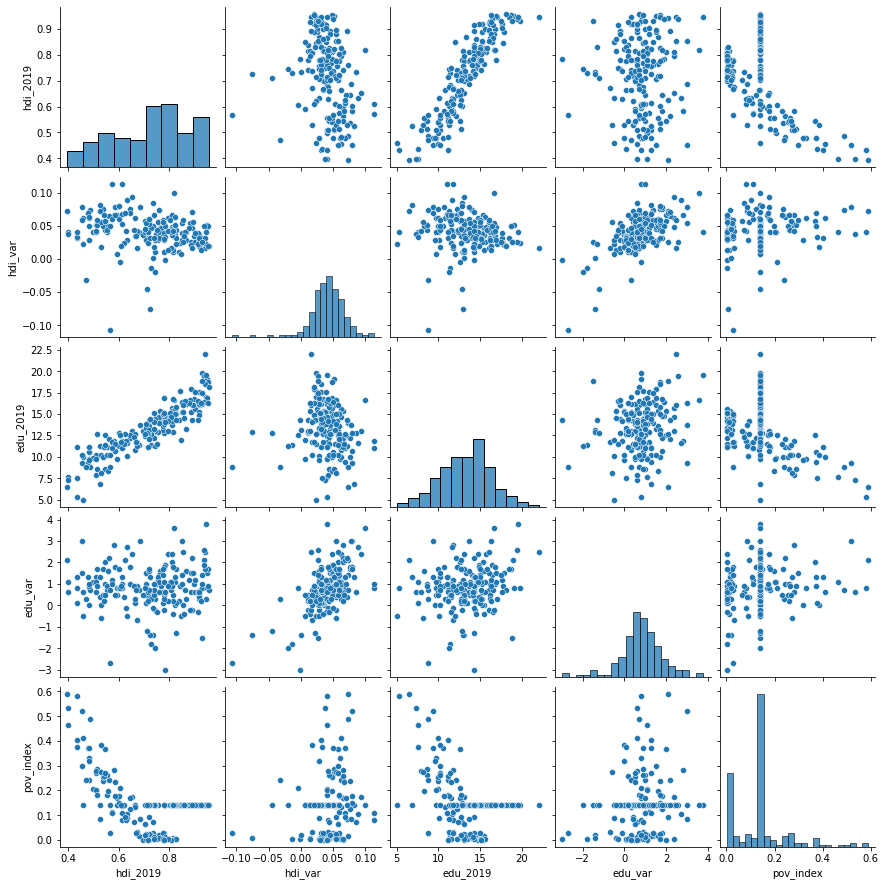

In [11]:
sns.pairplot(df)

<AxesSubplot:>

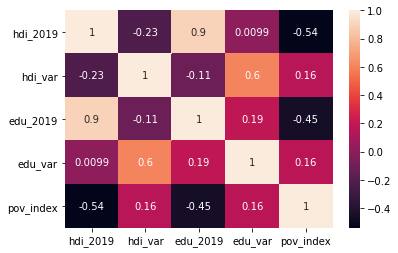

In [12]:
# Create a correlation heatmap for looking at the correlation of all variables.
figsize = (40,20)
sns.heatmap(df.corr(), annot = True)

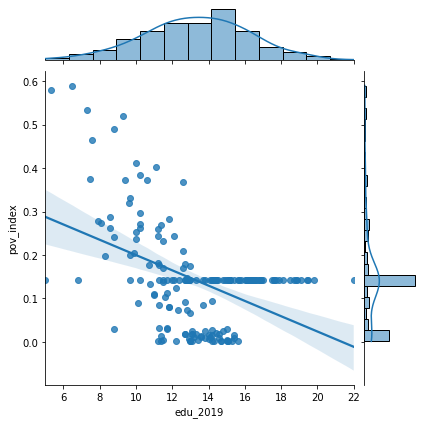

In [13]:
sns.jointplot(x= 'edu_2019', y = 'pov_index', data= df, kind= 'reg');

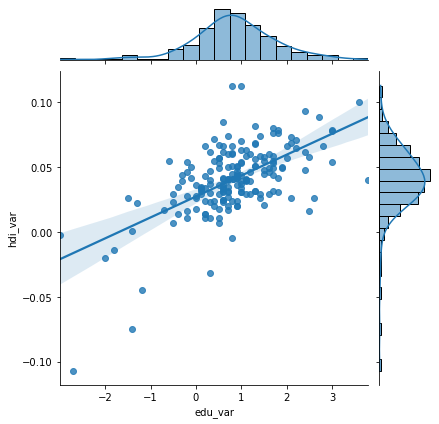

In [14]:
sns.jointplot(x= 'edu_var', y = 'hdi_var', data= df, kind= 'reg');

From the 2 plots above:
There is a negative correlation between poverty and education meaning that in case there is a confounder, improving education should result in decreased poverty. Strenght of the relationship between education and HDI (Shown on the 2nd graph above) shows that change in education over years directly positively impact HDI. 
So we can form as null hypothese H0: level of education improves poverty
Alternative hypothese H1: level of education does not improves poverty

## Pre-processing and Training Data Development

 People are identified as multidimensionally poor if the weighted sum of their deprivations is greater than or equal to a poverty cut off – such as 20%, 30% or 50% of all deprivations. For the purpose of this study, we will consider a treshold of 20%. Based on this criterion, a new column will be created to assess if each country is poor or not

In [15]:
# Creating a new column to record countries poor or not
import numpy as np
df['pov_class'] = np.where(df['pov_index'] > 0.2,  'poor', 'not poor')

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
df.pov_class.value_counts()

not poor    155
poor         34
Name: pov_class, dtype: int64

In [17]:
df.head()

,Country,hdi_2019,hdi_var,edu_2019,edu_var,pov_index,pov_class
0,Afghanistan,0.511,0.051,10.2,1.3,0.27200,poor
1,Albania,0.795,0.062,14.7,2.4,0.00300,not poor
2,Algeria,0.748,0.037,14.6,1.0,0.00800,not poor
3,Andorra,0.868,0.029,13.3,1.6,0.14129,not poor
4,Angola,0.581,0.066,11.8,2.8,0.28200,poor


In [18]:
# Extracting the list of countries rated poor as per the set criteria of 20%
df[df['pov_class']== 'poor']

,Country,hdi_2019,hdi_var,edu_2019,edu_var,pov_index,pov_class
0,Afghanistan,0.511,0.051000,10.2,1.300000,0.272,poor
4,Angola,0.581,0.066000,11.8,2.800000,0.282,poor
18,Benin,0.545,0.057000,12.6,2.000000,0.368,poor
26,Burkina Faso,0.452,0.079000,9.3,3.000000,0.519,poor
27,Burundi,0.433,0.032000,11.1,1.300000,0.403,poor
30,Cameroon,0.563,0.065000,12.1,2.200001,0.243,poor
32,Central African Republic,0.397,0.041000,7.6,1.100000,0.465,poor
33,Chad,0.398,0.037000,7.3,0.600000,0.533,poor
39,Congo (Democratic Republic of the),0.480,0.061000,9.7,0.800000,0.331,poor
45,C�te d'Ivoire,0.538,0.076000,10.0,1.700000,0.236,poor


In [19]:
final_df = df.drop(['Country'], axis = 1)

In [20]:
# Create dummies variables for the pov_class
final_df = pd.get_dummies(final_df, prefix = 'bool', drop_first = True)

In [21]:
# Extracting the features and labels
X = final_df.drop(['bool_poor'], axis = 1)
y =final_df.bool_poor

In [22]:
# Scaling data and performing PCA to identify the most meaningful features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

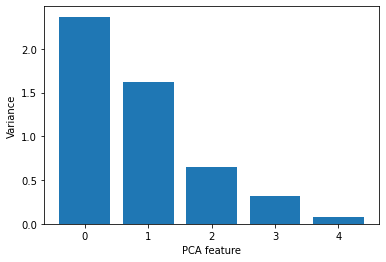

In [23]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [24]:
pca2 = PCA()
pca2.fit(X)
pca2_features = pca2.transform(X)
print(pca2_features.shape)

(189, 5)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca2_features, y, test_size=0.25)

In [26]:
scaler.fit(X_train)
scaler.transform(X_test)

array([[ 0.63427652,  0.35368183,  0.33131098,  1.45472157,  0.24762637],
       [-0.57979739, -0.19231093, -0.18816552, -0.65665873,  1.48665299],
       [-0.26976851, -0.03298886,  0.81881741, -1.10537829,  2.60041458],
       [ 0.89272625,  1.20194664,  0.84568517,  0.67436606, -1.6161325 ],
       [ 0.28772903,  0.18358499,  0.18253479,  0.83382577,  0.96358115],
       [-0.16914923,  0.29283203, -0.1649526 ,  1.88353857,  1.13264324],
       [-0.24200061, -1.2308281 ,  2.10307011, -1.16978796,  0.34552408],
       [ 1.45459451, -0.28029016,  0.64848653,  0.77259467,  0.73277518],
       [-0.58313407,  0.01091163, -1.37783825, -0.17779755,  0.53390678],
       [-0.49928517, -2.07580745,  0.63063791, -0.06095284,  0.65132508],
       [-1.10300444, -0.30118428,  0.68699783,  0.01676348,  0.29474783],
       [ 1.87966504, -0.49503194,  0.85339683,  0.3537729 , -0.30157623],
       [ 1.06450212,  1.33631553,  0.97872204,  0.6912567 , -1.40592028],
       [-0.14717988,  2.19280057, -0.4

# Modelling

### Model 1: Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
lr_score = mean_squared_error(y_test, y_pred)
print(lr_score)

0.04405120883028767


### Model2: Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor()
rf_score = np.mean(cross_val_score(rf, X_train, y_train, cv = 10))

In [36]:
print(rf_score)

0.6368828811188811


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [5,10,15,20], 'max_depth': [2,5,7,9]}
rf_grid_cv = GridSearchCV(rf, param_grid, cv=10)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [38]:
rf_grid_cv.best_params_

{'max_depth': 5, 'n_estimators': 15}

In [50]:
rf2 =  RandomForestRegressor(n_estimators=15, max_depth= 5)
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

from sklearn.metrics import mean_squared_error
rf_score = mean_squared_error(y_test, y_pred)

print('Random Forest performance: {}'.format(rf_score))

Random Forest performance: 0.03851851851851852
